In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow_datasets as tfds
import PIL

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 6s 0us/step


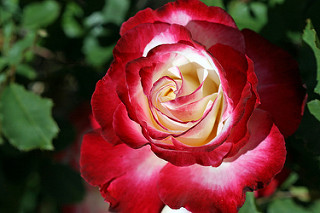

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[6]))

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


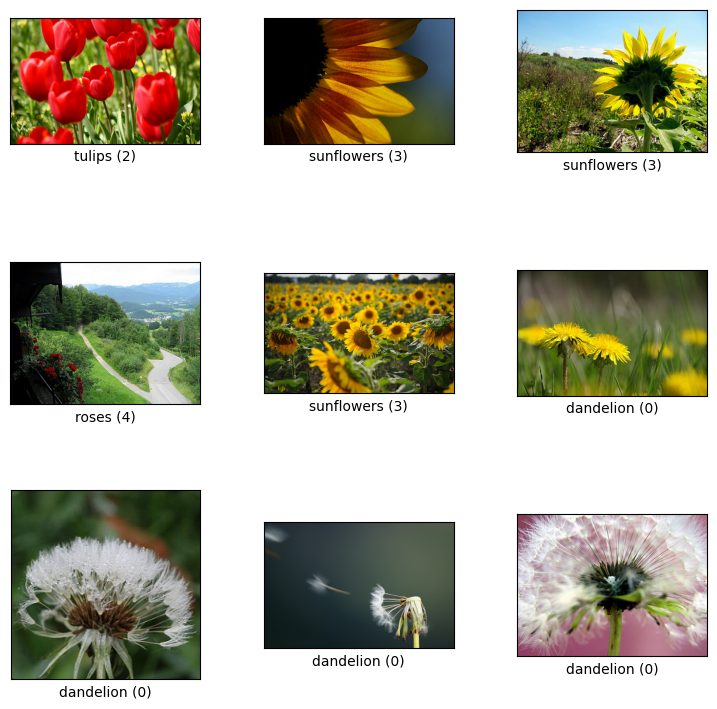

In [ ]:
ds, ds_info = tfds.load('tf_flowers', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)

In [ ]:
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

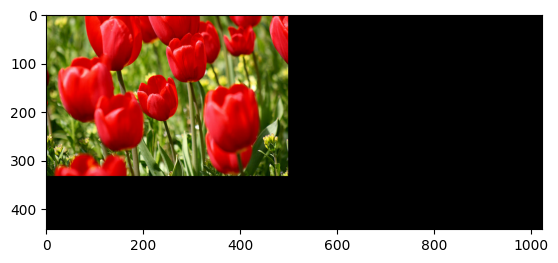

In [ ]:
plt.imshow(train_ds[0].numpy())

In [ ]:
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [ ]:
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 [==============================] - 20s 123ms/step - loss: 1.8050 - accuracy: 0.4608 - val_loss: 1.2766 - val_accuracy: 0.5311
Epoch 2/50
65/65 [==============================] - 5s 80ms/step - loss: 0.8753 - accuracy: 0.6915 - val_loss: 1.2739 - val_accuracy: 0.6226
Epoch 3/50
65/65 [==============================] - 6s 85ms/step - loss: 0.5584 - accuracy: 0.7942 - val_loss: 1.1888 - val_accuracy: 0.6342
Epoch 4/50
65/65 [==============================] - 5s 85ms/step - loss: 0.3731 - accuracy: 0.8667 - val_loss: 1.1631 - val_accuracy: 0.6732
Epoch 5/50
65/65 [==============================] - 5s 80ms/step - loss: 0.2569 - accuracy: 0.9017 - val_loss: 1.3709 - val_accuracy: 0.6537
Epoch 6/50
65/65 [==============================] - 5s 81ms/step - loss: 0.2195 - accuracy: 0.9251 - val_loss: 1.3157 - val_accuracy: 0.6868
Epoch 7/50
65/65 [==============================] - 6s 85ms/step - loss: 0.1478 - accuracy: 0.9528 - val_loss: 1.3651 - val_accuracy: 0.6984
Epoch 8/50


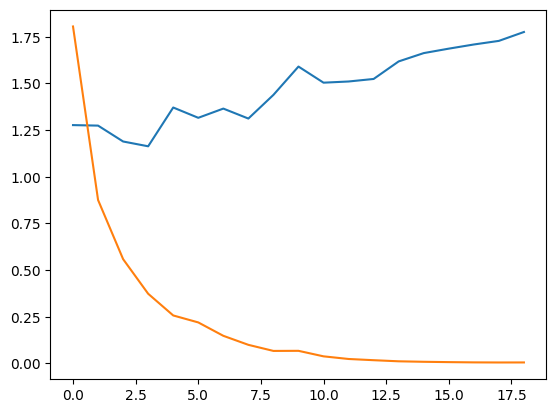

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])